In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate


dataset = pd.read_csv("/content/milknew.csv")

In [81]:
print(dataset.shape)
print(dataset.describe())
print(dataset.head())

print(dataset.columns)

(1059, 8)
                pH   Temprature        Taste         Odor         Fat   \
count  1059.000000  1059.000000  1059.000000  1059.000000  1059.000000   
mean      6.630123    44.226629     0.546742     0.432483     0.671388   
std       1.399679    10.098364     0.498046     0.495655     0.469930   
min       3.000000    34.000000     0.000000     0.000000     0.000000   
25%       6.500000    38.000000     0.000000     0.000000     0.000000   
50%       6.700000    41.000000     1.000000     0.000000     1.000000   
75%       6.800000    45.000000     1.000000     1.000000     1.000000   
max       9.500000    90.000000     1.000000     1.000000     1.000000   

         Turbidity       Colour  
count  1059.000000  1059.000000  
mean      0.491029   251.840415  
std       0.500156     4.307424  
min       0.000000   240.000000  
25%       0.000000   250.000000  
50%       0.000000   255.000000  
75%       1.000000   255.000000  
max       1.000000   255.000000  
    pH  Tempratur

In [82]:
print("Unique Values of the Columns\n")

#######################################
print("pH unique: ", dataset['pH'].unique())
print("Temperature unique: ", dataset['Temprature'].unique())
print("Taste unique: ", dataset['Taste'].unique())
print("Odor unique: ", dataset['Odor'].unique())
print("Fat unique: ", dataset['Fat '].unique())
print("Turbidity unique: ", dataset['Turbidity'].unique())
print("Grade unique: ", dataset['Grade'].unique())


Unique Values of the Columns

pH unique:  [6.6 8.5 9.5 5.5 4.5 8.1 6.7 5.6 8.6 7.4 6.8 6.5 4.7 3.  9.  6.4]
Temperature unique:  [35 36 70 34 37 45 60 66 50 55 90 38 40 43 42 41 65]
Taste unique:  [1 0]
Odor unique:  [0 1]
Fat unique:  [1 0]
Turbidity unique:  [0 1]
Grade unique:  ['high' 'low' 'medium']


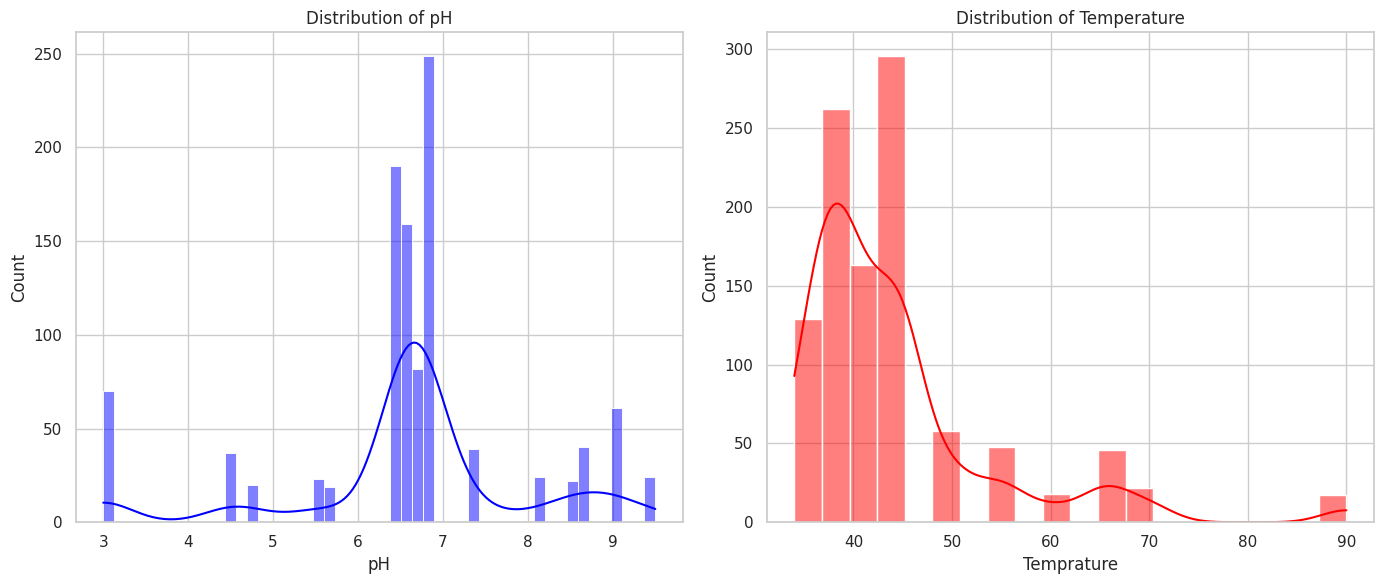

In [83]:
sns.set(style="whitegrid")
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(dataset['pH'].dropna(),bins=50 , kde=True,color='Blue')
plt.title("Distribution of pH")


plt.subplot(1,2,2)
sns.histplot(dataset['Temprature'].dropna(),bins=20 , kde=True,color='Red')
plt.title("Distribution of Temperature")

plt.tight_layout()
plt.show()

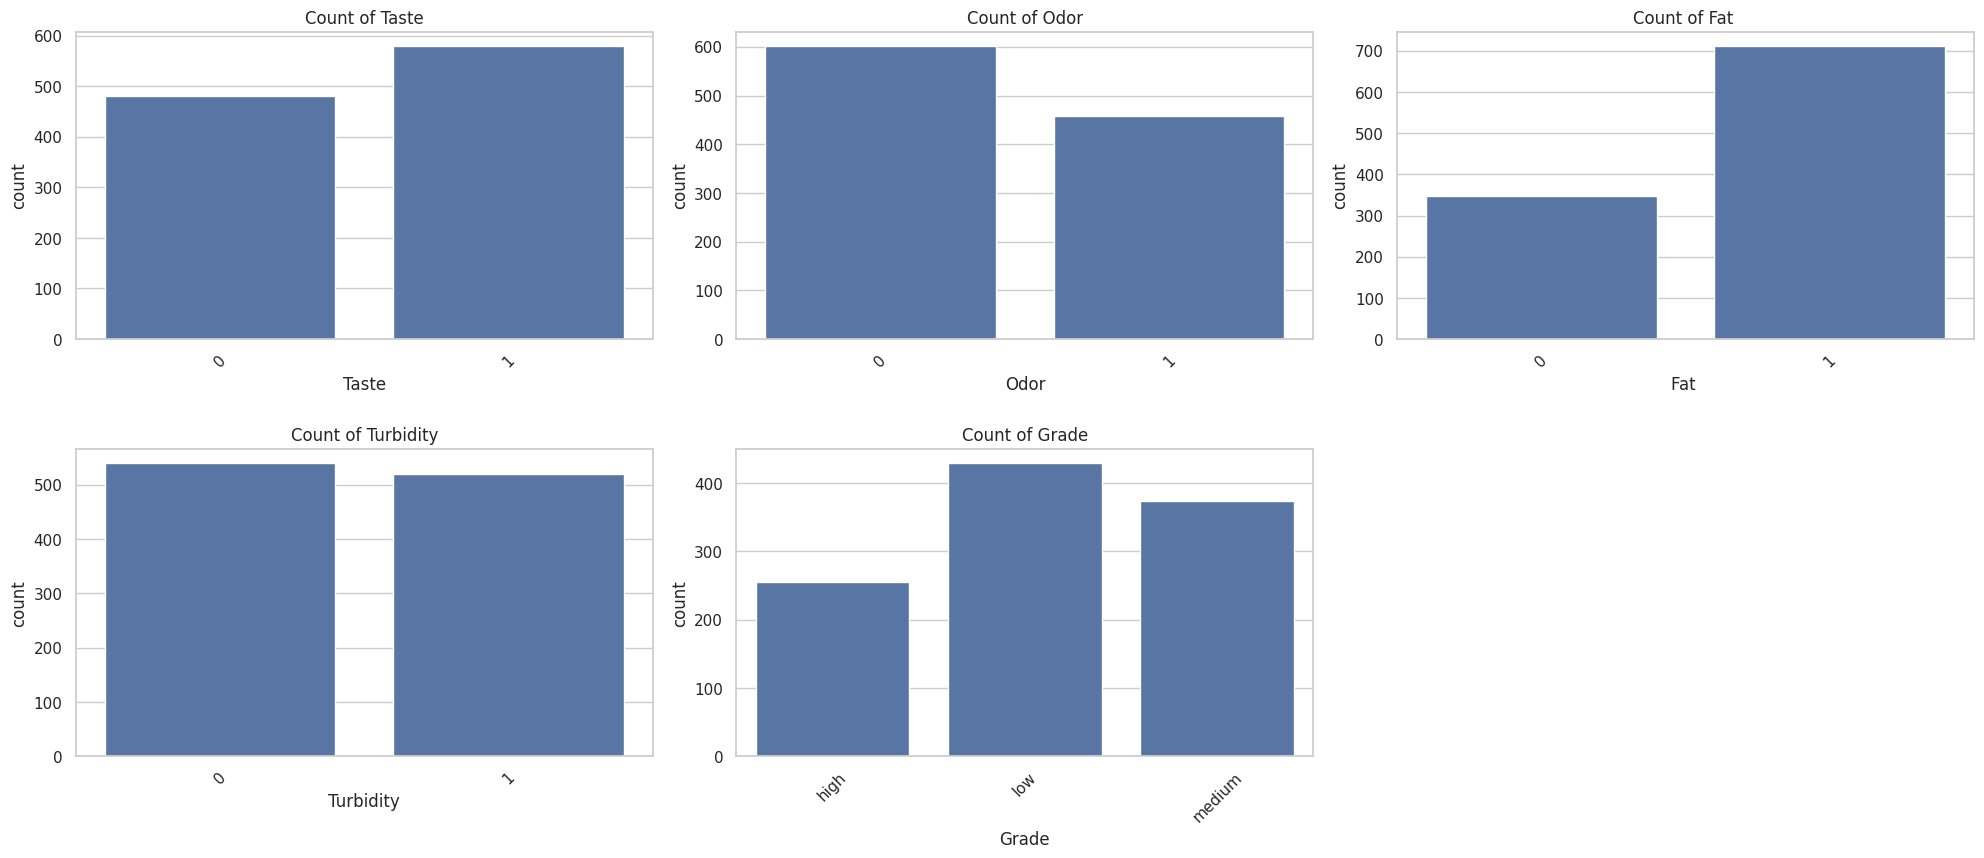

In [84]:
categorical_features = ['Taste' , 'Odor' , 'Fat ' , 'Turbidity' , 'Grade']

plt.figure(figsize=(20,12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, data=dataset)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

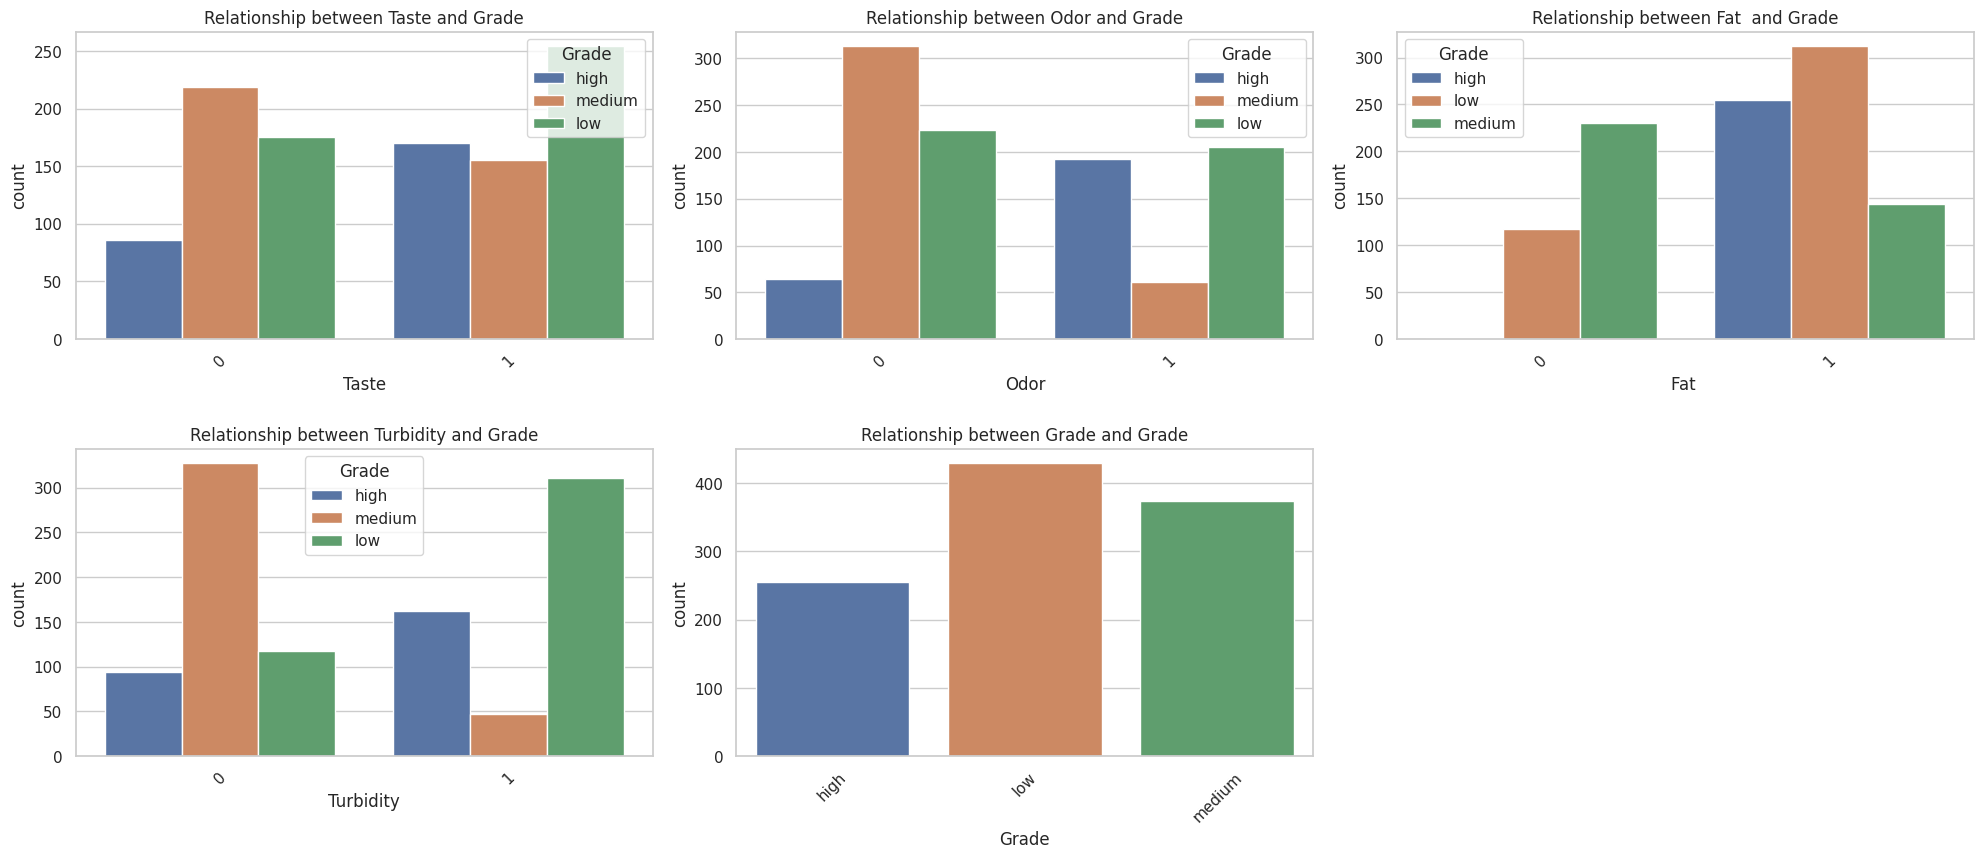

In [85]:
plt.figure(figsize=(20, 12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, hue='Grade', data=dataset)
    plt.title(f'Relationship between {feature} and Grade')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

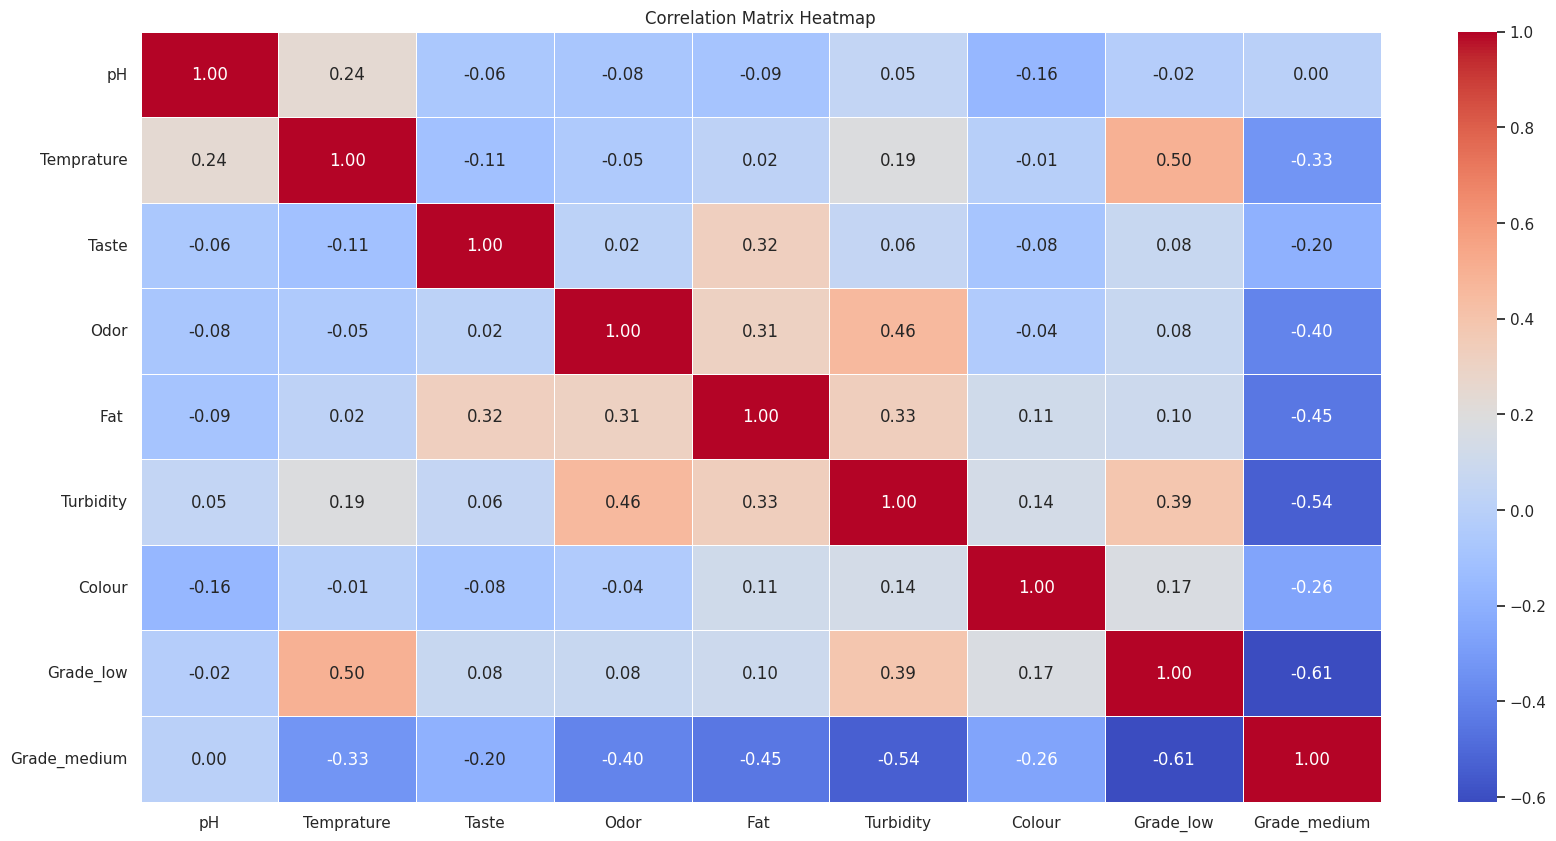

In [86]:
encoded_data = pd.get_dummies(dataset, drop_first=True)

correlation_matrix = encoded_data.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [87]:
missing_values = dataset.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

ph_bins = [-float('inf'), 4.0, 6.0, 7.0, 9.0, float('inf')]
ph_labels = ['Strongly Acidic', 'Moderately Acidic', 'Weakly Acidic', 'Weakly Alkaline', 'Strongly Alkaline']
dataset['pH_categories'] = pd.cut(dataset['pH'], bins=ph_bins, labels=ph_labels)

temp_bins = [-float('inf'), 35, 45, 65,float('inf')]
temp_labels = ['Cold', 'Cool', 'Warm', 'Hot']
dataset['temp_categories'] = pd.cut(dataset['Temprature'], bins=temp_bins, labels=temp_labels)

Missing Values in Each Column:
 pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64


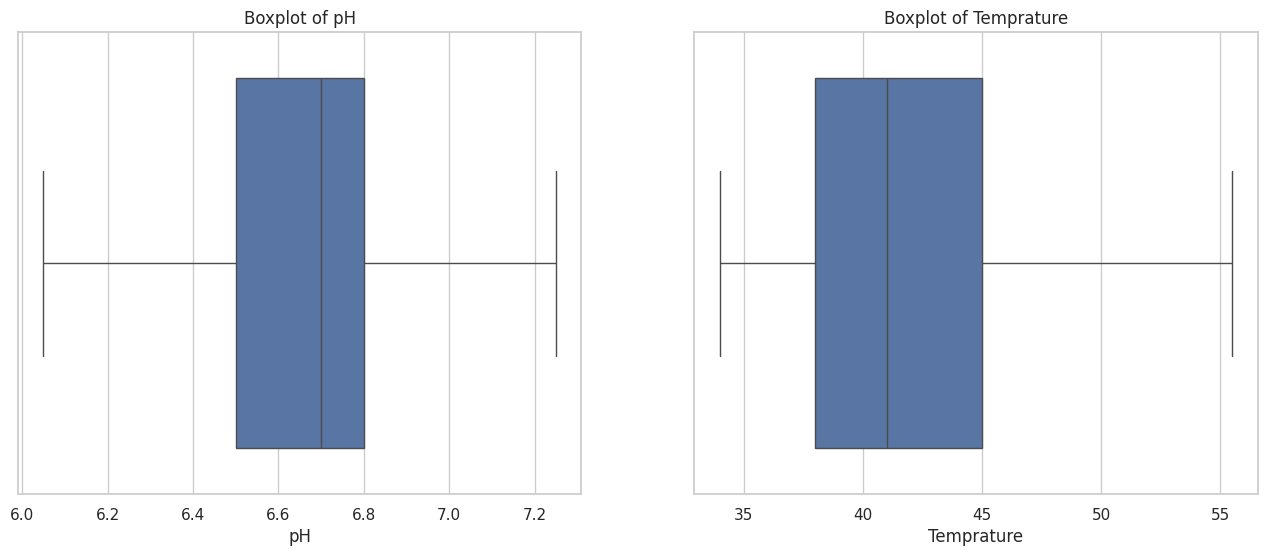

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to process
columns = ['pH', 'Temprature']

for col in columns:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    dataset[col] = np.where(dataset[col] < lower_bound, lower_bound, dataset[col])
    dataset[col] = np.where(dataset[col] > upper_bound, upper_bound, dataset[col])

# Plot boxplots for both columns
fig, axes = plt.subplots(1, len(columns), figsize=(16, 6))

for i, col in enumerate(columns):
    sns.boxplot(x=dataset[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.show()



Skewness of pH:
 -0.05907227158504661
Skewness of Temperature:
 0.7792382882460079
Skewness of Temperature:
 0.10709148968794442


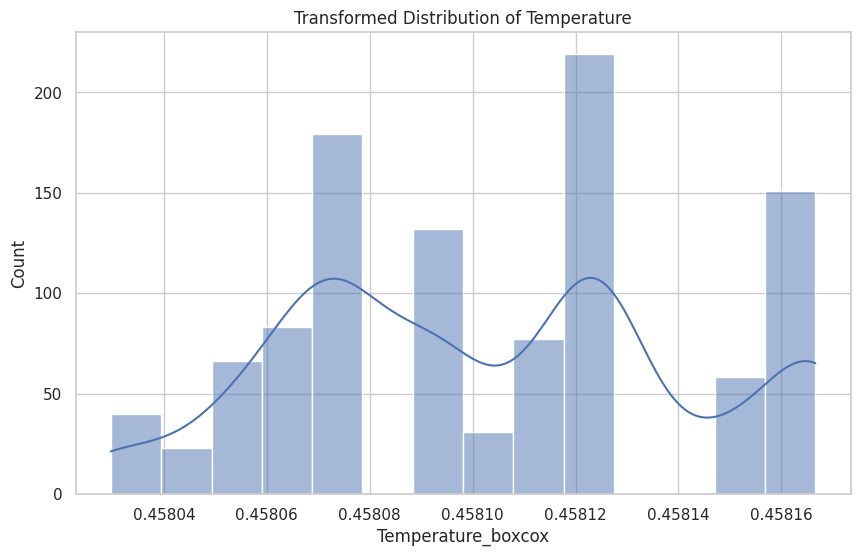

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade', 'pH_categories', 'temp_categories', 'Temperature_boxcox'],
      dtype='object')


In [90]:
print("Skewness of pH:\n", dataset['pH'].skew())
print("Skewness of Temperature:\n",dataset['Temprature'].skew())

if abs(dataset['Temprature'].skew()) > 0.5:
   dataset['Temperature_boxcox'], lambda_bc = boxcox(dataset['Temprature'])
   print("Skewness of Temperature:\n",dataset['Temperature_boxcox'].skew())


plt.figure(figsize=(10, 6))
sns.histplot(dataset['Temperature_boxcox'], kde=True)
plt.title('Transformed Distribution of Temperature')
plt.show()

print(dataset.columns)

## Feature Engineering


In [91]:
categorical_features = ['Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour','pH_categories', 'temp_categories'
]
dataset[categorical_features] = dataset[categorical_features].astype(str)

numeric_features = []

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Variance Threshold is set to identify features with low variance
variance_thresh = VarianceThreshold(threshold=0.01)

# PCA - Dimensionality reduction Technique
pca = PCA(n_components=0.95, random_state=42)

# Combine onehot encoding (i.e preprocessing), variance threshold, and PCA in a pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('variance_thresh', variance_thresh),
    ('pca', pca)
])


In [92]:
X = dataset.drop(columns=['Grade'])
y = dataset['Grade']

test_size = float(input("Enter the test size in decimals: "))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
print(f"Given input for test size is: {test_size}")

Enter the test size in decimals: 0.2
Given input for test size is: 0.2


In [93]:
X_train_transformed = preprocessing_pipeline.fit_transform(X_train)
X_test_transformed = preprocessing_pipeline.transform(X_test)

print("#" * 70)
print("X_test_transformed shape:", X_test_transformed.shape)
print("X_train_transformed shape:", X_train_transformed.shape)
print("First row of X_test_transformed has", len(X_test_transformed[0]), "features")
print("First row of X_train_transformed has", len(X_train_transformed[0]), "features")
print("#" * 70)


######################################################################
X_test_transformed shape: (212, 12)
X_train_transformed shape: (847, 12)
First row of X_test_transformed has 12 features
First row of X_train_transformed has 12 features
######################################################################


In [94]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_transformed, y_train)

preprocessed_features = preprocessing_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out()


In [95]:
selected_features_mask = preprocessing_pipeline.named_steps['variance_thresh'].get_support()
low_variance_features = preprocessed_features[~selected_features_mask]

pca_components = preprocessing_pipeline.named_steps['pca'].components_

In [96]:
# Calculate the contribution of each original feature to the principal components
# Get the features that were kept after variance thresholding
selected_features_mask = preprocessing_pipeline.named_steps['variance_thresh'].get_support()
preprocessed_features_after_variance = preprocessed_features[selected_features_mask]

# Create DataFrame with appropriate index
pca_loadings = pd.DataFrame(pca_components.T,
                            index=preprocessed_features_after_variance,
                            columns=[f'PC{i+1}' for i in range(pca_components.shape[0])])

#Identify the top contributing preprocessed features for each Pricipal Component for dimensionality reduction
top_contributors = pd.DataFrame()

for i in range(pca_loadings.shape[1]):
    top_contributors = pd.concat([top_contributors, pca_loadings[f'PC{i+1}'].nlargest(3)])

top_contributors = top_contributors.drop_duplicates()
print("Top Contributing Features for each PCA:\n", top_contributors)
print(top_contributors.shape)
# Convert top_contributors index to a set for unique feature selection
selected_features = set(top_contributors.index)

# Print summary
print(f"Selected Features Count: {len(selected_features)}")
print("Selected Features:")
print("\n".join(selected_features))

Top Contributing Features for each PCA:
                                     PC1       PC2       PC3       PC4  \
Turbidity_0                    0.423527       NaN       NaN       NaN   
Odor_0                         0.372198       NaN       NaN       NaN   
Fat _0                         0.330326       NaN       NaN       NaN   
Taste_1                             NaN  0.502671       NaN       NaN   
temp_categories_Cool                NaN  0.354701       NaN       NaN   
Turbidity_0                         NaN  0.208732       NaN       NaN   
pH_categories_Weakly Acidic         NaN       NaN  0.455451       NaN   
Odor_1                              NaN       NaN  0.428684       NaN   
Taste_0                             NaN       NaN  0.251006       NaN   
Colour_255                          NaN       NaN       NaN  0.813911   
Fat _1                              NaN       NaN       NaN  0.197598   
Turbidity_0                         NaN       NaN       NaN  0.150388   
Fat _1    

## Model Building

In [97]:
models = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42)
}

print("First row of X_test_transformed has", len(X_test_transformed[0]), "features")
print("First row of X_train_transformed has", len(X_train_transformed[0]), "features")

First row of X_test_transformed has 12 features
First row of X_train_transformed has 12 features


In [103]:
model_performance_pre_tuning = {}

for name, model in models.items():
    print(f"\n{'#' * 30}")
    print(f"Training {name}...")

    # Train model
    model.fit(X_train_res, y_train_res)

    # Predictions
    y_pred = model.predict(X_test_transformed)
    y_proba = model.predict_proba(X_test_transformed)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    report = classification_report(y_test, y_pred, output_dict=True)

    first_class_label = next(key for key in report.keys() if key not in ['accuracy', 'macro avg', 'weighted avg'])
    precision = report[first_class_label]['precision']
    recall = report[first_class_label]['recall']
    f1_score = report[first_class_label]['f1-score']
    miss_classification_rate = 1 - accuracy  # Corrected formula

    # Print performance metrics
    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"{'#' * 30}\n")

    # Store results
    model_performance_pre_tuning[name] = {
        'model': model,
        'Accuracy': round(accuracy, 2),
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'F1-Score': round(f1_score, 2),
        'Miss-Classification Rate': round(miss_classification_rate, 2),
        'ROC AUC': round(roc_auc, 2)
    }

# Print final model performance summary
print("\nFinal Model Performance Summary:")
for key, value in model_performance_pre_tuning.items():
    print(f"{key}: {value}")




##############################
Training KNN...
KNN Performance:
Accuracy: 0.9387
Precision: 0.8000
Recall: 1.0000
F1-Score: 0.8889
ROC AUC: 0.9933
Confusion Matrix:
[[48  0  0]
 [ 1 76  1]
 [11  0 75]]
##############################


##############################
Training Naive Bayes...
Naive Bayes Performance:
Accuracy: 0.8868
Precision: 0.7719
Recall: 0.9167
F1-Score: 0.8381
ROC AUC: 0.9763
Confusion Matrix:
[[44  1  3]
 [ 2 76  0]
 [11  7 68]]
##############################


##############################
Training Random Forest...
Random Forest Performance:
Accuracy: 0.9387
Precision: 0.7966
Recall: 0.9792
F1-Score: 0.8785
ROC AUC: 0.9961
Confusion Matrix:
[[47  1  0]
 [ 1 77  0]
 [11  0 75]]
##############################


##############################
Training AdaBoost...
AdaBoost Performance:
Accuracy: 0.9387
Precision: 0.7869
Recall: 1.0000
F1-Score: 0.8807
ROC AUC: 0.9888
Confusion Matrix:
[[48  0  0]
 [ 2 76  0]
 [11  0 75]]
##############################


#############

In [107]:
param_grids = {
    "KNN": {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    "Naive Bayes": {},  # No hyperparameters
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200, 300],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    "Decision Tree": {
        'max_depth': [3, 5, 7, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4, 5],
        'max_features': [None, 'sqrt', 'log2'],
        'class_weight': ['balanced', None]
    },
    "LogisticRegression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['liblinear', 'saga'],
        'class_weight': ['balanced', None]
    }
}

best_models = {}

for name, param_grid in param_grids.items():
    model = models.get(name)
    if model is None:
        print(f"Warning: Model {name} not found in the dictionary. Skipping...")
        continue

    if param_grid:  # If hyperparameters exist, perform GridSearchCV
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
        grid_search.fit(X_train_res, y_train_res)
        best_model = grid_search.best_estimator_
        print(f"Best {name} Parameters: {grid_search.best_params_}")
    else:
        best_model = model  # Use the default model without tuning

    best_models[name] = best_model

    # Store the Decision Tree model separately if applicable
    if name == "Decision Tree":
        dt_model = best_model

print("Hyperparameter tuning completed for all models.")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan

Best Random Forest Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best AdaBoost Parameters: {'learning_rate': 0.01, 'n_estimators': 50}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan

Best Decision Tree Parameters: {'class_weight': 'balanced', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best LogisticRegression Parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Hyperparameter tuning completed for all models.


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

In [115]:
model_performance_post_tuning = {}

for name, model in best_models.items():
    y_pred = model.predict(X_test_transformed)
    y_prob_positive_class = model.predict_proba(X_test_transformed)

    # Compute classification report once to avoid redundant calls
    report = classification_report(y_test, y_pred, output_dict=True)

    first_class_label = next(key for key in report.keys() if key not in ['accuracy', 'macro avg', 'weighted avg'])

    precision = report[first_class_label]['precision']
    recall = report[first_class_label]['recall']
    f1_score = report[first_class_label]['f1-score']
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob_positive_class,multi_class='ovr')
    confusion_matrix(y_test, y_pred)
    misclassification_rate = 1 - precision

    # Display model performance
    print(f"{'#' * 30}\n{name} Performance After Fine-Tuning:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

    # Store performance metrics
    model_performance_post_tuning[name] = {
        'model': model,
        'Accuracy': round(accuracy, 2),
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'F1-Score': round(f1_score, 2),
        'Miss-Classification Rate': round(misclassification_rate, 2),
        'ROC AUC': round(roc_auc, 2)
    }


##############################
KNN Performance After Fine-Tuning:
Accuracy: 0.9387
Precision: 0.7869
Recall: 1.0000
F1-Score: 0.8807
ROC AUC: 0.9928
Confusion Matrix:
[[48  0  0]
 [ 2 76  0]
 [11  0 75]]

##############################
Naive Bayes Performance After Fine-Tuning:
Accuracy: 0.8868
Precision: 0.7719
Recall: 0.9167
F1-Score: 0.8381
ROC AUC: 0.9763
Confusion Matrix:
[[44  1  3]
 [ 2 76  0]
 [11  7 68]]

##############################
Random Forest Performance After Fine-Tuning:
Accuracy: 0.9387
Precision: 0.7966
Recall: 0.9792
F1-Score: 0.8785
ROC AUC: 0.9961
Confusion Matrix:
[[47  1  0]
 [ 1 77  0]
 [11  0 75]]

##############################
AdaBoost Performance After Fine-Tuning:
Accuracy: 0.5519
Precision: 0.3750
Recall: 1.0000
F1-Score: 0.5455
ROC AUC: 0.8854
Confusion Matrix:
[[48  0  0]
 [63  0 15]
 [17  0 69]]

##############################
Decision Tree Performance After Fine-Tuning:
Accuracy: 0.9340
Precision: 0.8333
Recall: 0.9375
F1-Score: 0.8824
ROC AUC: 0.981

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



## ROC AUC Table:

+--------------------+--------------------+---------------------+
|     Model Name     | Pre-Tuning ROC AUC | Post-Tuning ROC AUC |
+--------------------+--------------------+---------------------+
|        KNN         |        0.99        |        0.99         |
|    Naive Bayes     |        0.98        |        0.98         |
|   Random Forest    |        1.0         |         1.0         |
|      AdaBoost      |        0.99        |        0.89         |
|   Decision Tree    |        0.99        |        0.98         |
| LogisticRegression |        1.0         |        0.93         |
+--------------------+--------------------+---------------------+

## Accuracy Table:

+--------------------+---------------------+----------------------+
|     Model Name     | Pre-Tuning Accuracy | Post-Tuning Accuracy |
+--------------------+---------------------+----------------------+
|        KNN         |        0.94         |         0.94         |
|    Naive Bayes     |     

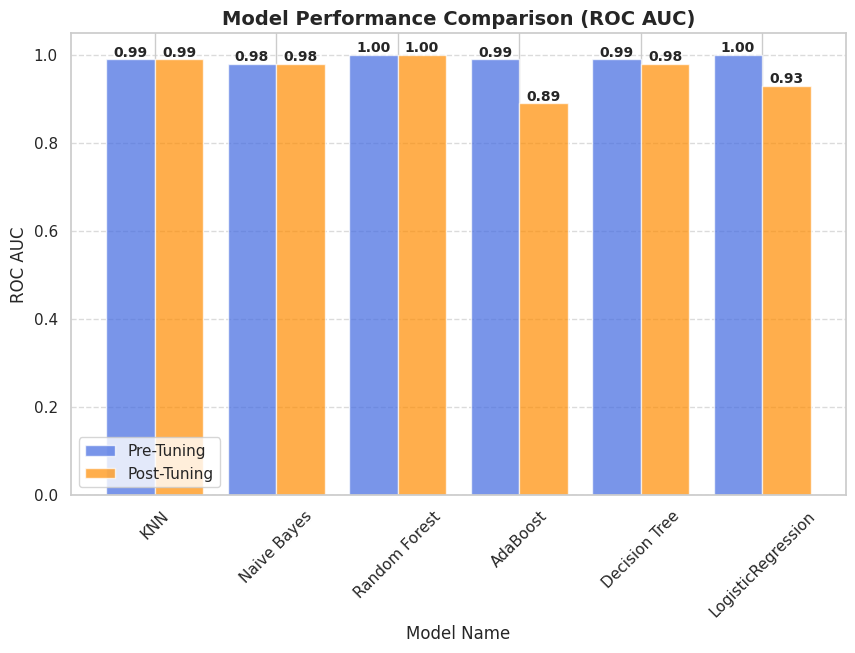

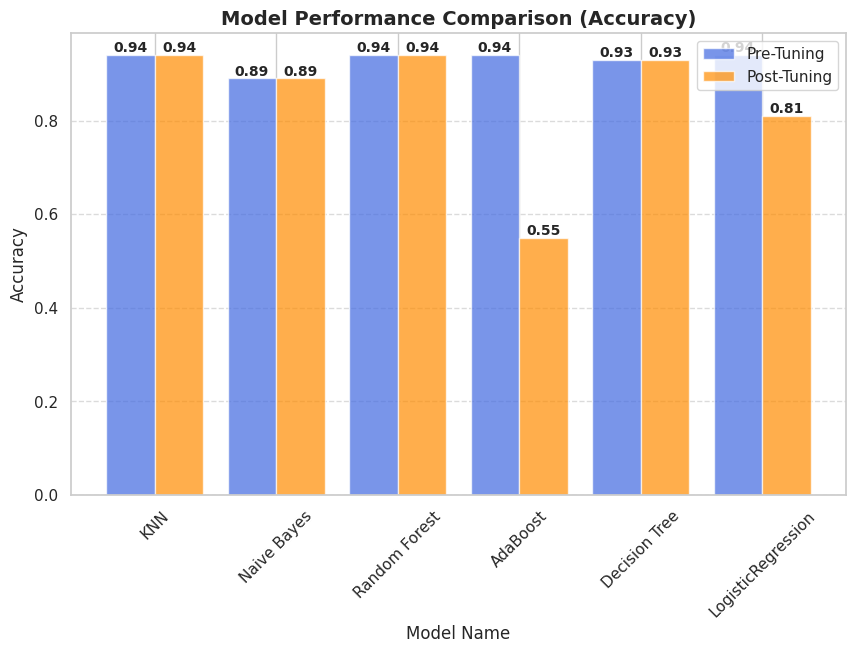

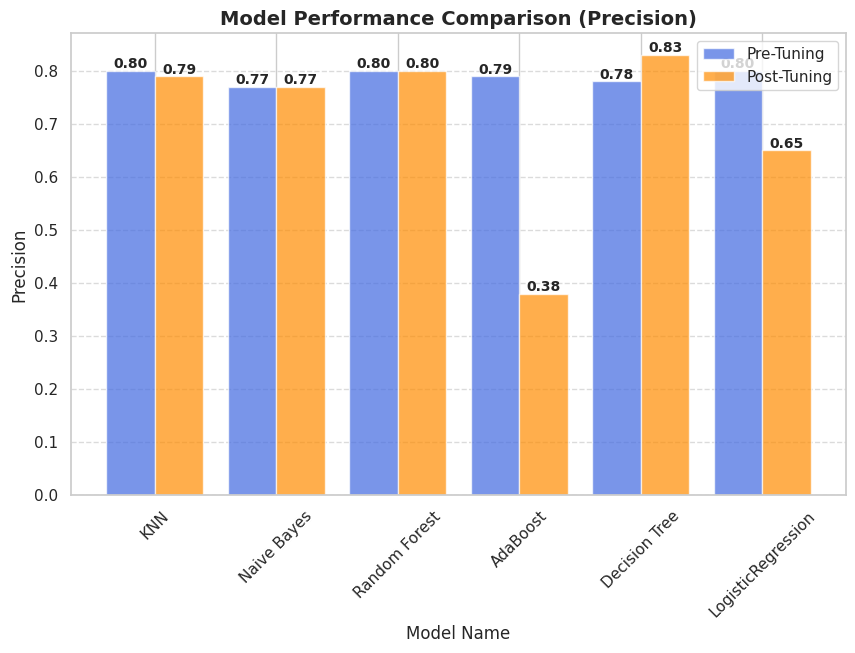

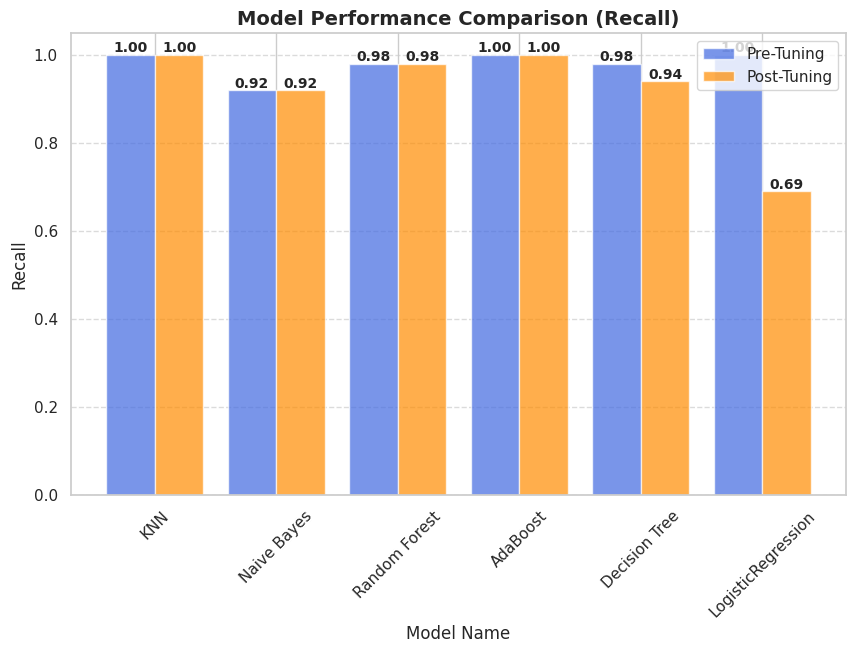

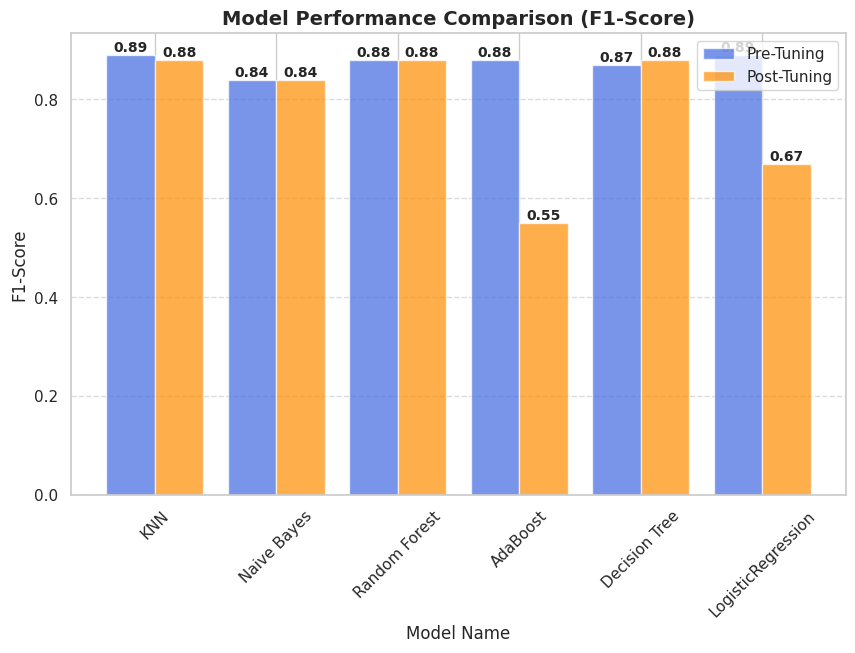

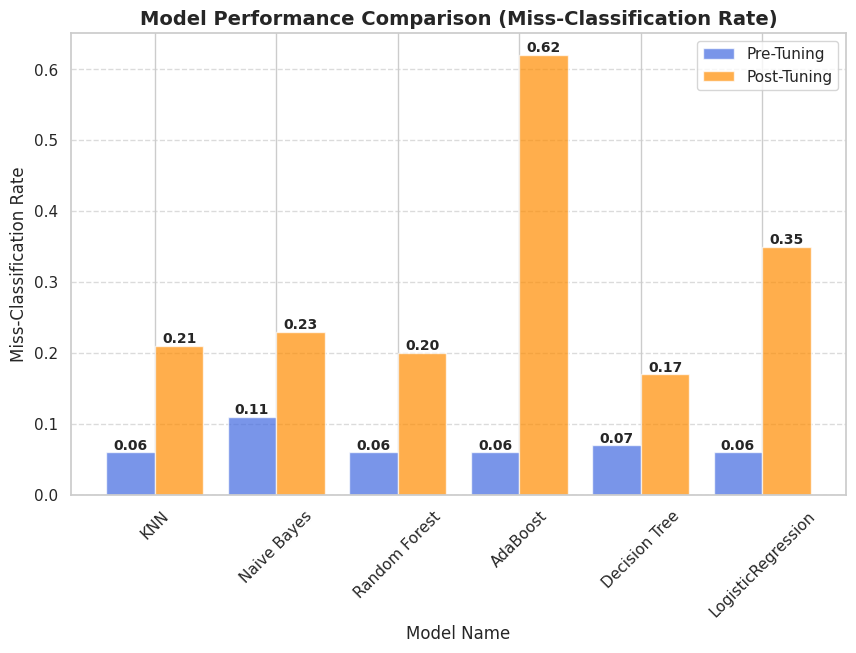


########################################
 Best Model: **Random Forest** (Based on ROC AUC)
 ROC AUC: 1.0
 Other Metrics:
   - Accuracy: 0.94
   - Precision: 0.8
   - Recall: 0.98
   - F1-Score: 0.88
   - Miss-Classification Rate: 0.2
   - ROC AUC: 1.0
########################################



In [119]:
def create_performance_table(
    model_performance_pre_tuning: dict,
    model_performance_post_tuning: dict,
    metric_name: str
) -> pd.DataFrame:
    """Creates a DataFrame comparing pre- and post-tuning model performance for a given metric."""
    model_names = list(model_performance_pre_tuning.keys())

    metric_pre = [model_performance_pre_tuning[m].get(metric_name, None) for m in model_names]
    metric_post = [model_performance_post_tuning.get(m, {}).get(metric_name, None) for m in model_names]

    return pd.DataFrame({
        "Model Name": model_names,
        f"Pre-Tuning {metric_name}": metric_pre,
        f"Post-Tuning {metric_name}": metric_post
    })


def create_bar_chart(model_names: list, metric_pre: list, metric_post: list, metric_name: str):
    """Generates a grouped bar chart comparing pre- and post-tuning metrics for models."""
    x = np.arange(len(model_names))
    width = 0.4

    plt.figure(figsize=(10, 6))
    bars1 = plt.bar(x - width/2, metric_pre, width=width, alpha=0.7, label="Pre-Tuning", color='royalblue')
    bars2 = plt.bar(x + width/2, metric_post, width=width, alpha=0.7, label="Post-Tuning", color='darkorange')

    # Annotate bars with values
    for bars in [bars1, bars2]:
        for bar in bars:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                     f"{bar.get_height():.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.xticks(x, model_names, rotation=45)
    plt.xlabel("Model Name", fontsize=12)
    plt.ylabel(metric_name, fontsize=12)
    plt.title(f"Model Performance Comparison ({metric_name})", fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


def generate_performance_tables(
    model_performance_pre_tuning: dict,
    model_performance_post_tuning: dict,
    metrics: list
) -> dict:
    """Generates multiple DataFrames for specified metrics."""
    return {metric: create_performance_table(model_performance_pre_tuning, model_performance_post_tuning, metric) for metric in metrics}


def suggest_best_model(model_performance_post_tuning: dict, primary_metric: str = "ROC AUC") -> str:
    """
    Suggests the best model based on a given primary metric.
    If there's a tie, considers secondary metrics.
    """
    if not model_performance_post_tuning:
        return "No models found!"

    # Sorting models based on the primary metric
    ranked_models = sorted(
        model_performance_post_tuning.items(),
        key=lambda item: item[1].get(primary_metric, 0),
        reverse=True
    )

    best_model_name, best_model_metrics = ranked_models[0]

    print("\n" + "#" * 40)
    print(f" Best Model: **{best_model_name}** (Based on {primary_metric})")
    print(f" {primary_metric}: {best_model_metrics.get(primary_metric, 'N/A')}")
    print(" Other Metrics:")
    for metric, value in best_model_metrics.items():
        if metric != "model":  # Exclude the model object itself
            print(f"   - {metric}: {value}")
    print("#" * 40 + "\n")

    return best_model_name


# Define metrics to compare
metrics = ["ROC AUC", "Accuracy", "Precision", "Recall", "F1-Score", "Miss-Classification Rate"]

# Generate tables
dataframes = generate_performance_tables(model_performance_pre_tuning, model_performance_post_tuning, metrics)

# Display DataFrames in tabular format
for metric, df in dataframes.items():
    print(f"\n## {metric} Table:\n")
    print(tabulate(df, headers="keys", tablefmt="pretty", showindex=False))

# Create bar charts for each metric
for metric, df in dataframes.items():
    metric_pre = df[f"Pre-Tuning {metric}"].tolist()
    metric_post = df[f"Post-Tuning {metric}"].tolist()
    create_bar_chart(df["Model Name"].tolist(), metric_pre, metric_post, metric)

# Suggest the best model based on ROC AUC (or another primary metric)
best_model = suggest_best_model(model_performance_post_tuning, primary_metric="ROC AUC")
